# ADS Homework #1
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 1, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - Probability (30 points)

Let's look at some basic probability simulations and how Python can be used as a tool to generate and evaluate probabilistic events.

**1.1)** Use the *numpy* or *random* library to generate a pair of six-sided dice. Simulate 100,000 roles of the dice, adding the two numbers together. Plot a histogram of the counts for each sum recorded. Caption the figure with any observations you may have (be sure to include a title); if you are unsure, make an educated gauss... er, I mean guess. (10 points)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(42)
%matplotlib inline

Text(0.5, 1.0, 'Stimulation of 100000 Rolls of A Pair of Six-sided Dice')

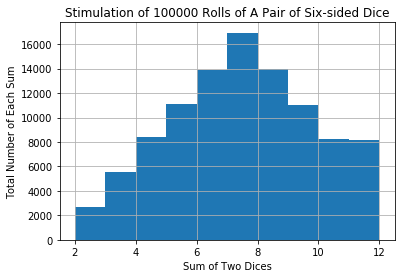

In [21]:
dice_rolling = np.random.randint(1, 7, size=(100000,2))
sum_of_two_dice = list(map(sum, dice_rolling))
plt.hist(sum_of_two_dice)
plt.xlabel("Sum of Two Dices")
plt.ylabel("Total Number of Each Sum")
plt.grid(True)
plt.title("Stimulation of 100000 Rolls of A Pair of Six-sided Dice")

Apparently, the sum of 6,7,8 have occured the most times. The sum of two have occured the least time.

**1.2)** Using *x* and *y* provided below, plot the data and answer the following questions. (20 points total)

In [2]:
x = range(20)
y = [14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
     55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

(a) Calculate corr(x,y) and provide a brief description of what this tells us. (5 points)

In [3]:
np.corrcoef(x,y)

array([[1.        , 0.95630101],
       [0.95630101, 1.        ]])

The result shows that these two lists are positively correlated.

(b) Generate a scatter plot of the data. Be sure to include a title and caption. (5 points)

Text(0.5, 1.0, 'Scatterplot of Simulated Data')

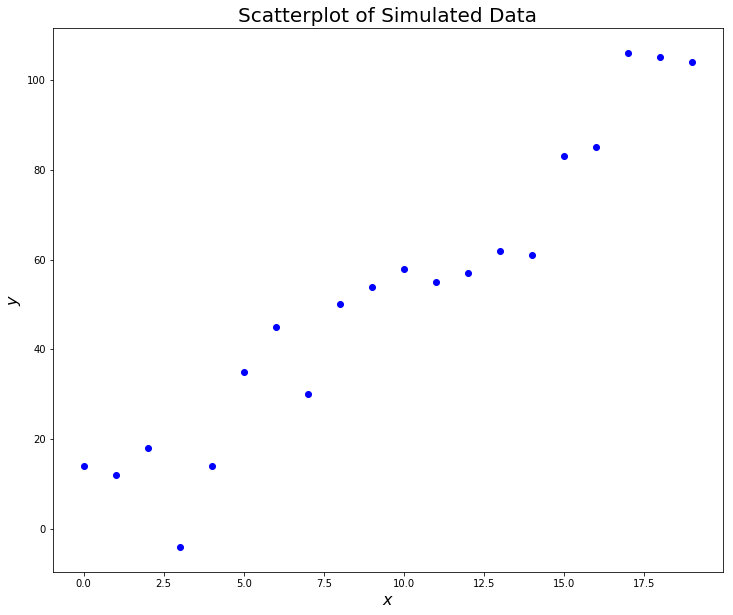

In [4]:
plt.figure(figsize=(12, 10))
plt.plot(x, y, 'bo')
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

The plot shows that as variable X increases, the varible Y tends to increase as well.

(c) There's obviously some linear correlation going on here... using the *statsmodels* or *sklearn* libraries, fit a line to the data and plot this on the scatter plot generated in *b*. In the caption, be sure to discuss the R-squared value for the fit. (10 points)

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import pandas as pd

In [6]:
data = pd.merge(pd.DataFrame(list(x)), pd.DataFrame(y), left_index=True, right_index=True)
data.rename(columns={'0_x':'x', '0_y':'y'}, inplace=True)

In [7]:
data.head()

,x,y
0,0,14.0
1,1,12.0
2,2,18.0
3,3,-4.0
4,4,14.0


Text(0.5, 1.0, 'Scatterplot of Simulated Data')

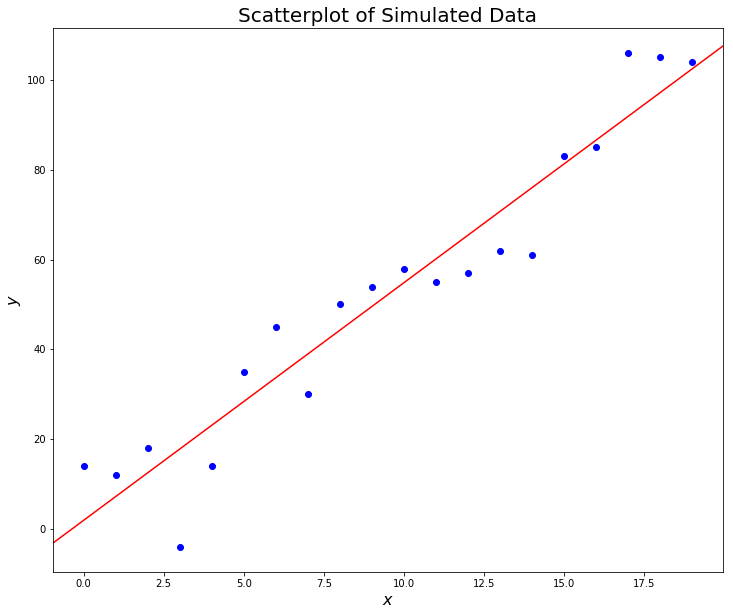

In [8]:
figure, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, c='b')
mod = smf.ols(formula='y ~ x', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

In [37]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           4.71e-11
Time:                        02:23:38   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.6

The R-squared is 0.915, which means these two variables have a very positive correlation.

### Problem 2 (35 Points)

You are staring out the window from the 13th story of CUSP, looking on as people bustle about Jay Street; some head to the subway, others wait in line for street food, and yet others seem to wander around aimlessly. You don't know or care about what they are doing or where they are going. The one thing that you do know for certain is that none of them were born on a leap-day (February 29th). You also have recently found a dataset on subway ridership in NYC in which people have self-reported their birthdays. 

Because you are a data scientist, you begin to wonder... 'What is the likelihood that any one of them shares my birthday?' Knowing that, due to a variety of reasons, real-life births are not evenly distributed throughout the year, you decide to dig into the dataset to see if you can uncover trends in what time of year people are born. The dataset, unfortunately is a little messy, due to a poor user-interface, but with a bit of cleaning, should be fine to use. Let's take a closer look at the 'births.csv' dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

birthdays = pd.read_csv('birthdays.csv') # make sure file is in same folder as notebook
birthdays.index = birthdays.index + 1   
birthdays.index.name = 'day_of_year'

birthdays.head()

,month,day,births,subway_ridership
day_of_year,,,,
1,1,1,160369,46.763549
2,1,2,169896,38.745642
3,1,3,180036,42.628351
4,1,4,182854,38.160858
5,1,5,184145,2.195034


* **'day_of_year'** describes the day of the year from January 1. <br>
* **'births'** describes the number of births that users registered for a given date <br>
* **'subway_ridership'** describes the average reported subway ridership (rides/month) for people born on that day.

2.1) First plot the birthday data (ignore subway ridership for now) and see if there are any patterns. If so, what are they? Include a description below your plot describing your observations and possible explainations - these observations can just be hypotheses, and do not have to be correct. (10 points)

Text(0, 0.5, 'Births')

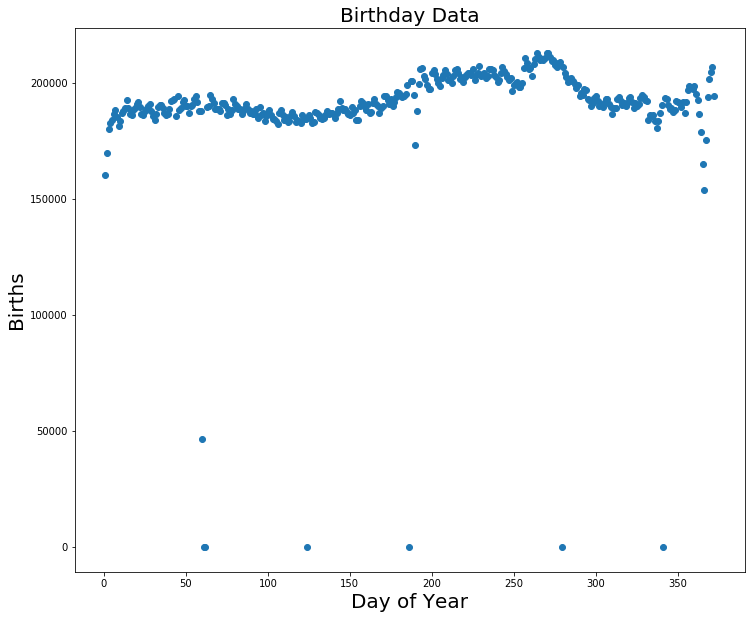

In [24]:
plt.figure(figsize=(12, 10))
plt.scatter(birthdays.index, birthdays['births'])
plt.title('Birthday Data', fontsize=20)
plt.xlabel('Day of Year', fontsize=20)
plt.ylabel('Births', fontsize=20)

There are some outliers on the plot. Maybe there are certain time that people do not want to have kids. 

2.2) You should notice an issue in the data that you have plotted. Taking a glance at the raw datapoints should provide the answer. Please make note of what the issue is, and print the first 65 rows of a cleaned-up dataset. (15 points)

The issue is that there are certain months that only have 30 days or less. But in the data, they all have 31 days. The number of births associated with those date are those outliers. It is inaccurate.

In [25]:
cleaned_birthdays = birthdays.drop(birthdays[birthdays['births'] < 5000].index)

In [26]:
cleaned_birthdays.head(65)

,month,day,births,subway_ridership
day_of_year,,,,
1,1,1,160369,46.763549
2,1,2,169896,38.745642
3,1,3,180036,42.628351
4,1,4,182854,38.160858
5,1,5,184145,2.195034
6,1,6,186726,16.720587
7,1,7,188277,5.829813
8,1,8,185186,45.891352
9,1,9,181511,14.486921


3.3) Plot the data again, and use the 'sort_values' method to examine high and low points. Do you notice anything about overall trends in births by time of year? Do any specific dates stand out? (10 points)

Text(0, 0.5, 'Births')

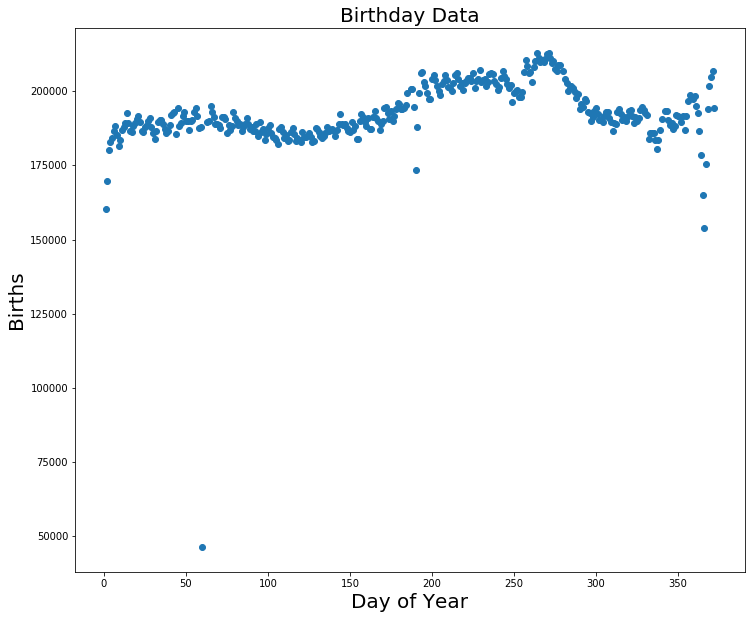

In [29]:
plt.figure(figsize=(12, 10))
plt.scatter(cleaned_birthdays.index, cleaned_birthdays['births'])
plt.title('Birthday Data', fontsize=20)
plt.xlabel('Day of Year', fontsize=20)
plt.ylabel('Births', fontsize=20)

In [30]:
cleaned_birthdays.sort_values(by='births')

,month,day,births,subway_ridership
day_of_year,,,,
60,2,29,46420,41.043065
366,12,25,153778,57.497671
1,1,1,160369,46.763549
365,12,24,165050,109.870765
2,1,2,169896,38.745642
190,7,4,173413,58.183340
367,12,26,175341,109.450518
364,12,23,178667,56.755423
3,1,3,180036,42.628351


In [31]:
cleaned_birthdays.index = range(366)

According to the graph, the most people are born in September. The least people are born in 02/29 since it occurs every four years. Also, less people are born in 12/24, 12/25, 01/01, which are all big national holidays.

### Problem 3 (35 Points)

Now that you've got clean data, you're curious... are people traveling on the subway more likely to have certain birthdays than others? A friend next to you makes the dubious claim that people born later in the year tend to ride the subway more often. You don't believe her, but want to use your data science skills to show that she's wrong (or to discover that you're wrong! Which is notably one of the most exciting experiences in the field of data science). You decide to test her claim armed with your newly-cleaned data and linear regression.

3.1) State the null hypothesis. (5 points)

The null hypothesis is people born later in the year tend to ride the subway more often.

3.2) Generate a scatter plot with subway ridership (the dependant variable) on the y-axis and birthday (as day of year) (the independant variable) on the x-axis. Fit a regression line to the data. (15 points)

Text(0.5, 1.0, 'Scatterplot of Simulated Data')

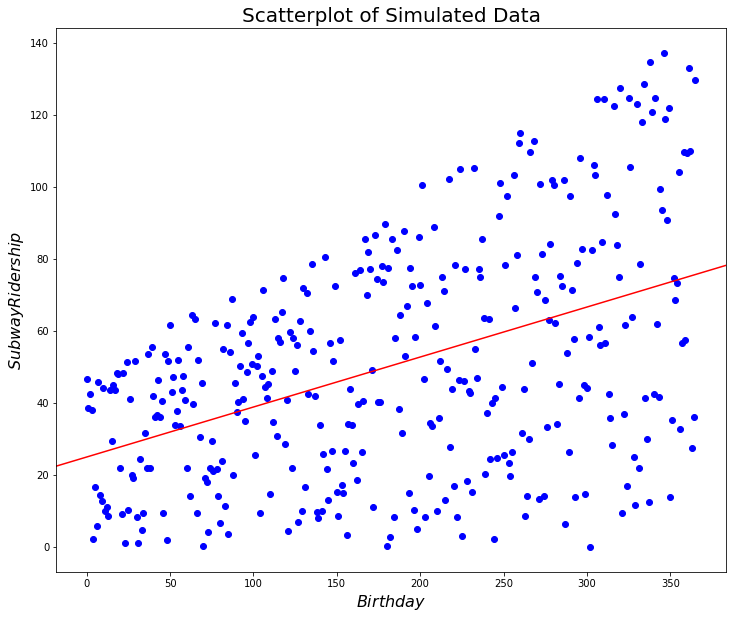

In [32]:
figure, ax = plt.subplots(figsize=(12, 10))
ax.scatter(cleaned_birthdays.index, cleaned_birthdays['subway_ridership'], c='b')

mod_1 = smf.ols(formula="cleaned_birthdays['subway_ridership'] ~cleaned_birthdays.index", data = cleaned_birthdays).fit()
abline_plot(model_results=mod_1, ax=ax, color='red')

plt.xlabel(r'$Birthday$', fontsize = 16)
plt.ylabel(r'$Subway Ridership$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

3.3) Print the summary statistics of your regression and discuss if your results confirm or reject the null hypothesis at a p-value of 0.05. Discuss the possible implications of Type 1 & Type 2 errors and the choice of a 0.05 p-value. (15 points)

In [33]:
print(mod_1.summary())

                                      OLS Regression Results                                     
Dep. Variable:     cleaned_birthdays['subway_ridership']   R-squared:                       0.207
Model:                                               OLS   Adj. R-squared:                  0.205
Method:                                    Least Squares   F-statistic:                     94.98
Date:                                   Mon, 01 Oct 2018   Prob (F-statistic):           4.30e-20
Time:                                           02:11:27   Log-Likelihood:                -1748.2
No. Observations:                                    366   AIC:                             3500.
Df Residuals:                                        364   BIC:                             3508.
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

I think the result confirms the null hypothesis since the p-value equals 0. The possible implcations of Type 1 & Type 2 error will be Type 2 error: it falsely shows there is no correlation between two variables.